In [501]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from scipy import stats
import math

In [504]:
fertility = pd.read_csv("fertility_2003-2013.csv")
fertility.drop(['Indicator Name','Indicator Code'], axis=1, inplace=True)
fertility.rename(columns={'2003':'2003_fer',
                          '2004':'2004_fer',
                          '2005':'2005_fer',
                          '2006':'2006_fer',
                           '2007':'2007_fer',
                           '2008':'2008_fer',
                           '2009':'2009_fer',
                           '2010':'2010_fer',
                           '2011':'2011_fer',
                           '2012':'2012_fer',
                           '2013':'2013_fer'}, inplace=True)
fertility.head()


,Country Name,Country Code,Region,2003_fer,2004_fer,2005_fer,2006_fer,2007_fer,2008_fer,2009_fer,2010_fer,2011_fer,2012_fer,2013_fer
0,Aruba,ABW,Latin America & Caribbean,1.805,1.786,1.769,1.754,1.739,1.726,1.713,1.701,1.690,1.681,1.673
1,Andorra,AND,Europe & Central Asia,NaN,NaN,NaN,1.240,1.180,1.250,1.190,1.220,NaN,NaN,NaN
2,Afghanistan,AFG,South Asia,7.321,7.136,6.930,6.702,6.456,6.196,5.928,5.659,5.395,5.141,4.900
3,Angola,AGO,Sub-Saharan Africa,6.743,6.704,6.657,6.598,6.523,6.434,6.331,6.218,6.099,5.979,5.863
4,Albania,ALB,Europe & Central Asia,2.097,2.004,1.919,1.849,1.796,1.761,1.744,1.741,1.748,1.760,1.771


In [505]:
income = pd.read_csv("income_2003-2013.csv")

income_new = income[(income != 0.000000).all(1)]
income_new.rename(columns={'2003':'2003_inc',
                          '2004':'2004_inc',
                          '2005':'2005_inc',
                          '2006':'2006_inc',
                           '2007':'2007_inc',
                           '2008':'2008_inc',
                           '2009':'2009_inc',
                           '2010':'2010_inc',
                           '2011':'2011_inc',
                           '2012':'2012_inc',
                           '2013':'2013_inc'}, inplace=True)

In [506]:
m = fertility.merge(income_new, on = ["Country Name","Country Code"],how = 'left')
m.head()
#m.shape

,Country Name,Country Code,Region _x,2003_fer,2004_fer,2005_fer,2006_fer,2007_fer,2008_fer,2009_fer,...,2004_inc,2005_inc,2006_inc,2007_inc,2008_inc,2009_inc,2010_inc,2011_inc,2012_inc,2013_inc
0,Aruba,ABW,Latin America & Caribbean,1.805,1.786,1.769,1.754,1.739,1.726,1.713,...,19503.280280,16199.594850,20567.526980,19423.428950,23229.613610,21289.646600,19741.149800,19960.521210,21038.151120,20841.489470
1,Andorra,AND,Europe & Central Asia,NaN,NaN,NaN,1.240,1.180,1.250,1.190,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,South Asia,7.321,7.136,6.930,6.702,6.456,6.196,5.928,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Angola,AGO,Sub-Saharan Africa,6.743,6.704,6.657,6.598,6.523,6.434,6.331,...,440.752797,563.934596,856.912210,819.694989,367.194821,735.380805,1108.338717,1494.240377,1789.733615,2113.866121
4,Albania,ALB,Europe & Central Asia,2.097,2.004,1.919,1.849,1.796,1.761,1.744,...,2232.469483,2500.857583,2808.973837,3333.996140,3961.899406,3622.330148,3530.690656,3853.165353,3644.843103,3937.277061


In [507]:
m.drop(['Region _y'], axis=1, inplace=True)
m.rename(columns={'Region _x':'Region'},inplace=True)
m.columns

Index(['Country Name', 'Country Code', 'Region', '2003_fer', '2004_fer',
       '2005_fer', '2006_fer', '2007_fer', '2008_fer', '2009_fer', '2010_fer',
       '2011_fer', '2012_fer', '2013_fer', 'Indicator Name', '2003_inc',
       '2004_inc', '2005_inc', '2006_inc', '2007_inc', '2008_inc', '2009_inc',
       '2010_inc', '2011_inc', '2012_inc', '2013_inc'],
      dtype='object')

In [508]:
life = pd.read_csv("life_expectancy_2003-2013.csv")
m1 = m.merge(life, on = ["Country Name","Country Code"],how = 'left')
m1.rename(columns={'2003':'2003_life',
                          '2004':'2004_life',
                          '2005':'2005_life',
                          '2006':'2006_life',
                           '2007':'2007_life',
                           '2008':'2008_life',
                           '2009':'2009_life',
                           '2010':'2010_life',
                           '2011':'2011_life',
                           '2012':'2012_life',
                           '2013':'2013_life'}, inplace=True)
m1.columns

Index(['Country Name', 'Country Code', 'Region', '2003_fer', '2004_fer',
       '2005_fer', '2006_fer', '2007_fer', '2008_fer', '2009_fer', '2010_fer',
       '2011_fer', '2012_fer', '2013_fer', 'Indicator Name_x', '2003_inc',
       '2004_inc', '2005_inc', '2006_inc', '2007_inc', '2008_inc', '2009_inc',
       '2010_inc', '2011_inc', '2012_inc', '2013_inc', 'Indicator Name_y',
       'Region ', 'Indicator Code', '2003_life', '2004_life', '2005_life',
       '2006_life', '2007_life', '2008_life', '2009_life', '2010_life',
       '2011_life', '2012_life', '2013_life'],
      dtype='object')

In [509]:
m1.drop(['Indicator Name_y','Region ', 'Indicator Code'], axis=1, inplace=True)
m1.rename(columns={'Indicator Name_x':'Indicator Name'},inplace=True)
m1.columns

Index(['Country Name', 'Country Code', 'Region', '2003_fer', '2004_fer',
       '2005_fer', '2006_fer', '2007_fer', '2008_fer', '2009_fer', '2010_fer',
       '2011_fer', '2012_fer', '2013_fer', 'Indicator Name', '2003_inc',
       '2004_inc', '2005_inc', '2006_inc', '2007_inc', '2008_inc', '2009_inc',
       '2010_inc', '2011_inc', '2012_inc', '2013_inc', '2003_life',
       '2004_life', '2005_life', '2006_life', '2007_life', '2008_life',
       '2009_life', '2010_life', '2011_life', '2012_life', '2013_life'],
      dtype='object')

In [510]:
population = pd.read_csv("population_2003-2013.csv")
population.head()

,Country Name,Country Code,Region,Indicator Name,Indicator Code,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Aruba,ABW,Latin America & Caribbean,"Population, total",SP.POP.TOTL,97015.0,98742.0,100031.0,100830.0,101218.0,101342.0,101416.0,101597.0,101936.0,102393.0,102921.0
1,Andorra,AND,Europe & Central Asia,"Population, total",SP.POP.TOTL,74783.0,78337.0,81223.0,83373.0,84878.0,85616.0,85474.0,84419.0,82326.0,79316.0,75902.0
2,Afghanistan,AFG,South Asia,"Population, total",SP.POP.TOTL,22507368.0,23499850.0,24399948.0,25183615.0,25877544.0,26528741.0,27207291.0,27962207.0,28809167.0,29726803.0,30682500.0
3,Angola,AGO,Sub-Saharan Africa,"Population, total",SP.POP.TOTL,16691395.0,17295500.0,17912942.0,18541467.0,19183907.0,19842251.0,20520103.0,21219954.0,21942296.0,22685632.0,23448202.0
4,Albania,ALB,Europe & Central Asia,"Population, total",SP.POP.TOTL,3039616.0,3026939.0,3011487.0,2992547.0,2970017.0,2947314.0,2927519.0,2913021.0,2904780.0,2900489.0,2897366.0


In [511]:
m2 = m1.merge(population, on = ["Country Name","Country Code"],how = 'left')
m2.rename(columns={'2003':'2003_population',
                          '2004':'2004_population',
                          '2005':'2005_population',
                          '2006':'2006_population',
                           '2007':'2007_population',
                           '2008':'2008_population',
                           '2009':'2009_population',
                           '2010':'2010_population',
                           '2011':'2011_population',
                           '2012':'2012_population',
                           '2013':'2013_population'}, inplace=True)
m2.shape

(215, 51)

In [512]:
m2.head()

,Country Name,Country Code,Region,2003_fer,2004_fer,2005_fer,2006_fer,2007_fer,2008_fer,2009_fer,...,2004_population,2005_population,2006_population,2007_population,2008_population,2009_population,2010_population,2011_population,2012_population,2013_population
0,Aruba,ABW,Latin America & Caribbean,1.805,1.786,1.769,1.754,1.739,1.726,1.713,...,98742.0,100031.0,100830.0,101218.0,101342.0,101416.0,101597.0,101936.0,102393.0,102921.0
1,Andorra,AND,Europe & Central Asia,NaN,NaN,NaN,1.240,1.180,1.250,1.190,...,78337.0,81223.0,83373.0,84878.0,85616.0,85474.0,84419.0,82326.0,79316.0,75902.0
2,Afghanistan,AFG,South Asia,7.321,7.136,6.930,6.702,6.456,6.196,5.928,...,23499850.0,24399948.0,25183615.0,25877544.0,26528741.0,27207291.0,27962207.0,28809167.0,29726803.0,30682500.0
3,Angola,AGO,Sub-Saharan Africa,6.743,6.704,6.657,6.598,6.523,6.434,6.331,...,17295500.0,17912942.0,18541467.0,19183907.0,19842251.0,20520103.0,21219954.0,21942296.0,22685632.0,23448202.0
4,Albania,ALB,Europe & Central Asia,2.097,2.004,1.919,1.849,1.796,1.761,1.744,...,3026939.0,3011487.0,2992547.0,2970017.0,2947314.0,2927519.0,2913021.0,2904780.0,2900489.0,2897366.0


In [513]:
m2.columns

Index(['Country Name', 'Country Code', 'Region', '2003_fer', '2004_fer',
       '2005_fer', '2006_fer', '2007_fer', '2008_fer', '2009_fer', '2010_fer',
       '2011_fer', '2012_fer', '2013_fer', 'Indicator Name_x', '2003_inc',
       '2004_inc', '2005_inc', '2006_inc', '2007_inc', '2008_inc', '2009_inc',
       '2010_inc', '2011_inc', '2012_inc', '2013_inc', '2003_life',
       '2004_life', '2005_life', '2006_life', '2007_life', '2008_life',
       '2009_life', '2010_life', '2011_life', '2012_life', '2013_life',
       'Region ', 'Indicator Name_y', 'Indicator Code', '2003_population',
       '2004_population', '2005_population', '2006_population',
       '2007_population', '2008_population', '2009_population',
       '2010_population', '2011_population', '2012_population',
       '2013_population'],
      dtype='object')

In [514]:
m2.drop([ 'Region ', 'Indicator Name_y', 'Indicator Code'], axis=1, inplace=True)
m2_new = m2.dropna(axis=0, how='any')
m2_new = m2_new.rename(columns={'Indicator Name_x':'Indicator Name'})

In [515]:
m2_new.shape

(159, 48)

In [516]:
m2_new.columns

Index(['Country Name', 'Country Code', 'Region', '2003_fer', '2004_fer',
       '2005_fer', '2006_fer', '2007_fer', '2008_fer', '2009_fer', '2010_fer',
       '2011_fer', '2012_fer', '2013_fer', 'Indicator Name', '2003_inc',
       '2004_inc', '2005_inc', '2006_inc', '2007_inc', '2008_inc', '2009_inc',
       '2010_inc', '2011_inc', '2012_inc', '2013_inc', '2003_life',
       '2004_life', '2005_life', '2006_life', '2007_life', '2008_life',
       '2009_life', '2010_life', '2011_life', '2012_life', '2013_life',
       '2003_population', '2004_population', '2005_population',
       '2006_population', '2007_population', '2008_population',
       '2009_population', '2010_population', '2011_population',
       '2012_population', '2013_population'],
      dtype='object')

In [ ]:
m2_new.to_csv("Clean_merged_data.csv",index=False)

In [520]:
data = pd.read_csv("Clean_merged_data.csv")
new.shape

(159, 48)

In [521]:
data.columns

Index(['Country Name', 'Country Code', 'Region', '2003_fer', '2004_fer',
       '2005_fer', '2006_fer', '2007_fer', '2008_fer', '2009_fer', '2010_fer',
       '2011_fer', '2012_fer', '2013_fer', 'Indicator Name', '2003_inc',
       '2004_inc', '2005_inc', '2006_inc', '2007_inc', '2008_inc', '2009_inc',
       '2010_inc', '2011_inc', '2012_inc', '2013_inc', '2003_life',
       '2004_life', '2005_life', '2006_life', '2007_life', '2008_life',
       '2009_life', '2010_life', '2011_life', '2012_life', '2013_life',
       '2003_population', '2004_population', '2005_population',
       '2006_population', '2007_population', '2008_population',
       '2009_population', '2010_population', '2011_population',
       '2012_population', '2013_population'],
      dtype='object')

In [522]:
data_life_ex = data[['Country Name', 'Country Code', 'Region','2003_life',
       '2004_life', '2005_life', '2006_life', '2007_life', '2008_life',
       '2009_life', '2010_life', '2011_life', '2012_life', '2013_life']]
data_inc = data[['Country Name', 'Country Code', 'Region','2003_inc',
       '2004_inc', '2005_inc', '2006_inc', '2007_inc', '2008_inc', '2009_inc',
       '2010_inc', '2011_inc', '2012_inc', '2013_inc']]
data_pop = data[['Country Name', 'Country Code', 'Region','2003_population', '2004_population', '2005_population',
       '2006_population', '2007_population', '2008_population',
       '2009_population', '2010_population', '2011_population',
       '2012_population', '2013_population']]
data_fer = data[['Country Name', 'Country Code', 'Region', '2003_fer', '2004_fer',
       '2005_fer', '2006_fer', '2007_fer', '2008_fer', '2009_fer', '2010_fer',
       '2011_fer', '2012_fer', '2013_fer']]

In [523]:
x = data_life_ex.groupby('Region').mean()
x_inc = data_inc.groupby('Region').mean()
x2_inc = x_inc*x_inc
x_pop = data_pop.groupby('Region').mean()
x2_pop = x_pop*x_pop
x_fer = data_fer.groupby('Region').mean()
x2_fer = x_fer * x_fer

In [524]:
y = x.transpose()
y2 = x2_inc.transpose()
y_inc = x_inc.transpose()
y2_pop = x2_pop.transpose()
y_pop = x_pop.transpose()
y_fer = x_fer.transpose()
y2_fer = x2_fer.transpose()


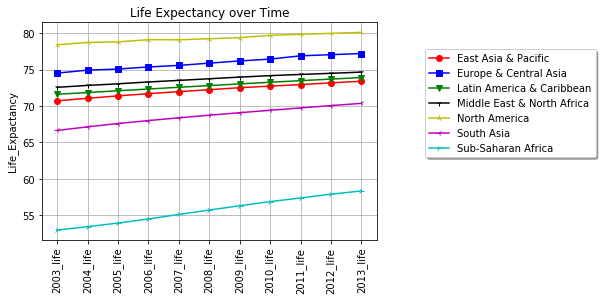

In [525]:
# Plot
plt.plot(y.index,y["East Asia & Pacific"],marker = "o",color = 'r',label = "East Asia & Pacific")
plt.plot(y.index,y["Europe & Central Asia"],marker = "s",color = 'blue',label = "Europe & Central Asia")
plt.plot(y.index,y["Latin America & Caribbean"],marker = "v",color = 'g',label = "Latin America & Caribbean")
plt.plot(y.index,y["Middle East & North Africa"],marker = "1",color = 'k',label = "Middle East & North Africa")
plt.plot(y.index,y["North America"],marker = "2",color = 'y',label = "North America")
plt.plot(y.index,y["South Asia"],marker = "3",color = 'm',label = "South Asia")
plt.plot(y.index,y["Sub-Saharan Africa"],marker = "4",color = 'c',label = "Sub-Saharan Africa")
plt.xticks( rotation="vertical")
lgnd = plt.legend(loc='best',title='Region')
plt.grid()
plt.title("Life Expectancy over Time")
plt.legend(loc='upper center', bbox_to_anchor=(1.4, 0.9), shadow=True, ncol=1)
plt.ylabel("Life_Expactancy")
plt.savefig('Life_expectancy_trend.png')

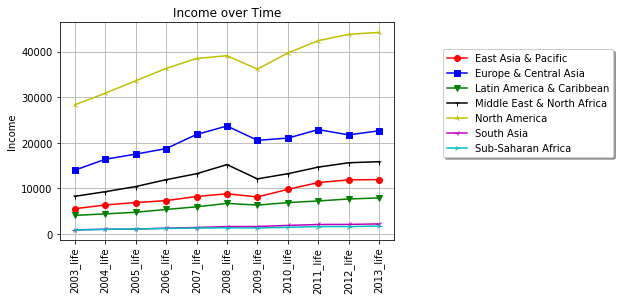

In [526]:
plt.plot(y.index,y_inc["East Asia & Pacific"],marker = "o",color = 'r',label = "East Asia & Pacific")
plt.plot(y.index,y_inc["Europe & Central Asia"],marker = "s",color = 'blue',label = "Europe & Central Asia")
plt.plot(y.index,y_inc["Latin America & Caribbean"],marker = "v",color = 'g',label = "Latin America & Caribbean")
plt.plot(y.index,y_inc["Middle East & North Africa"],marker = "1",color = 'k',label = "Middle East & North Africa")
plt.plot(y.index,y_inc["North America"],marker = "2",color = 'y',label = "North America")
plt.plot(y.index,y_inc["South Asia"],marker = "3",color = 'm',label = "South Asia")
plt.plot(y.index,y_inc["Sub-Saharan Africa"],marker = "4",color = 'c',label = "Sub-Saharan Africa")
plt.xticks( rotation="vertical")
lgnd = plt.legend(loc='best',title='Region')
plt.grid()
plt.title("Income over Time")
plt.ylabel("Income")
plt.legend(loc='upper center', bbox_to_anchor=(1.4, 0.9), shadow=True, ncol=1)
plt.savefig('Income_trend.png')

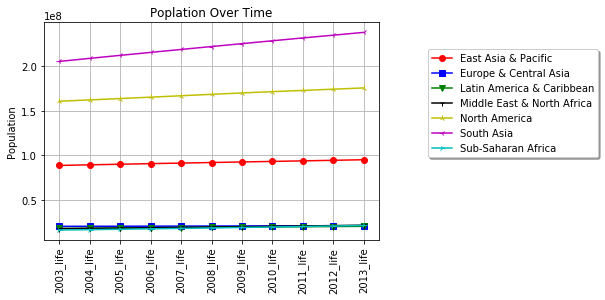

In [527]:
plt.plot(y.index,y_pop["East Asia & Pacific"],marker = "o",color = 'r',label = "East Asia & Pacific")
plt.plot(y.index,y_pop["Europe & Central Asia"],marker = "s",color = 'blue',label = "Europe & Central Asia")
plt.plot(y.index,y_pop["Latin America & Caribbean"],marker = "v",color = 'g',label = "Latin America & Caribbean")
plt.plot(y.index,y_pop["Middle East & North Africa"],marker = "1",color = 'k',label = "Middle East & North Africa")
plt.plot(y.index,y_pop["North America"],marker = "2",color = 'y',label = "North America")
plt.plot(y.index,y_pop["South Asia"],marker = "3",color = 'm',label = "South Asia")
plt.plot(y.index,y_pop["Sub-Saharan Africa"],marker = "4",color = 'c',label = "Sub-Saharan Africa")
plt.xticks( rotation="vertical")
lgnd = plt.legend(loc='best',title='Region')
plt.grid()
plt.title("Poplation Over Time")
plt.ylabel("Population")
plt.legend(loc='upper center', bbox_to_anchor=(1.4, 0.9), shadow=True, ncol=1)
plt.savefig("Population_trend.png")

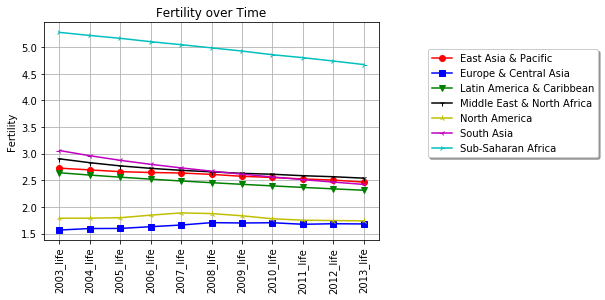

In [528]:
# Plot
plt.plot(y.index,y_fer["East Asia & Pacific"],marker = "o",color = 'r',label = "East Asia & Pacific")
plt.plot(y.index,y_fer["Europe & Central Asia"],marker = "s",color = 'blue',label = "Europe & Central Asia")
plt.plot(y.index,y_fer["Latin America & Caribbean"],marker = "v",color = 'g',label = "Latin America & Caribbean")
plt.plot(y.index,y_fer["Middle East & North Africa"],marker = "1",color = 'k',label = "Middle East & North Africa")
plt.plot(y.index,y_fer["North America"],marker = "2",color = 'y',label = "North America")
plt.plot(y.index,y_fer["South Asia"],marker = "3",color = 'm',label = "South Asia")
plt.plot(y.index,y_fer["Sub-Saharan Africa"],marker = "4",color = 'c',label = "Sub-Saharan Africa")
plt.xticks( rotation="vertical")
lgnd = plt.legend(loc='best',title='Region')
plt.grid()
plt.title("Fertility over Time")
plt.legend(loc='upper center', bbox_to_anchor=(1.4, 0.9), shadow=True, ncol=1)
plt.ylabel("Fertility")
plt.savefig("Fertility_trend_overtime.png")

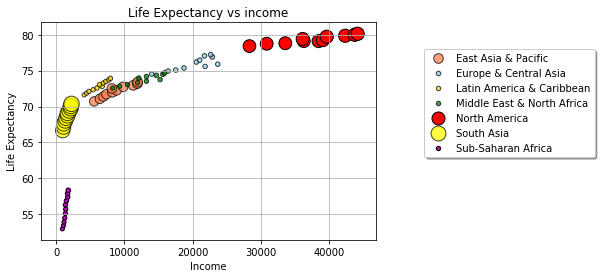

In [529]:
plt.scatter(y_inc["East Asia & Pacific"], y["East Asia & Pacific"],
            s=y_pop["East Asia & Pacific"]/1000000,facecolor="coral", alpha=0.75, edgecolors = 'black' ,label = "East Asia & Pacific")
plt.scatter(y_inc["Europe & Central Asia"],y["Europe & Central Asia"],
            s=y_pop["Europe & Central Asia"]/1000000,facecolor="skyblue", alpha=0.75, edgecolors = 'black' ,label = "Europe & Central Asia")
plt.scatter(y_inc["Latin America & Caribbean"],y["Latin America & Caribbean"],
            s=y_pop["Latin America & Caribbean"]/1000000,facecolor="gold",  alpha=0.75, edgecolors = 'black' ,label = "Latin America & Caribbean")
plt.scatter(y_inc["Middle East & North Africa"],y["Middle East & North Africa"],
            s=y_pop["Middle East & North Africa"]/1000000,facecolor="green",  alpha=0.75, edgecolors = 'black' ,label = "Middle East & North Africa")
plt.scatter(y_inc["North America"],y["North America"],facecolor="red", 
            s=y_pop["North America"]/1000000,alpha=1, edgecolors = 'black' ,label = "North America")
plt.scatter(y_inc["South Asia"],y["South Asia"],
            s=y_pop["South Asia"]/1000000,facecolor="yellow",  alpha=0.75, edgecolors = 'black' ,label = "South Asia")
plt.scatter(y_inc["Sub-Saharan Africa"],y["Sub-Saharan Africa"],
            s=y_pop["Sub-Saharan Africa"]/1000000,facecolor="m",  alpha=1, edgecolors = 'black' ,label = "Sub-Saharan Africa")
plt.grid()
lgnd = plt.legend(loc='upper left',title='Region')

plt.title("Life Expectancy vs income")
plt.xlabel("Income")
plt.ylabel("Life Expectancy")
plt.legend(loc='upper center', bbox_to_anchor=(1.4, 0.9), shadow=True, ncol=1)
plt.savefig("Life_Expectancy_vs_income.png")

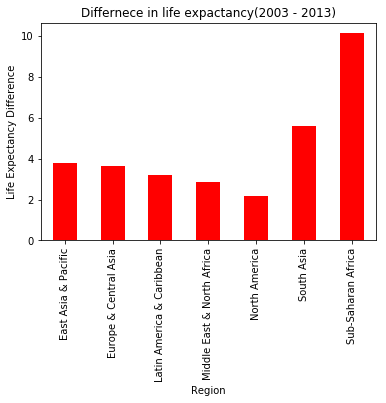

In [530]:
mean_life_exp = round(data_life_ex.groupby("Region").mean(),2)
mean_income = round(data_inc.groupby("Region").mean(),2)
mean_life_exp_t = mean_life_exp.transpose()
mean_income_t = mean_income.transpose()
diff = (mean_life_exp_t.iloc[-1] - mean_life_exp_t.iloc[0])/mean_life_exp_t.iloc[0]*100

diff.plot(kind="bar", facecolor="red")
plt.title("Differnece in life expactancy(2003 - 2013)")
plt.ylabel("Life Expectancy Difference")
plt.xlabel("Region")
plt.savefig("Life_Expectancy_Difference.png")

In [531]:
year = ["2003","2004","2005","2006","2007","2008","2009","2010","2011","2012","2013"]


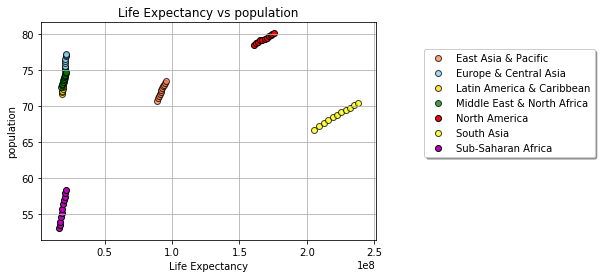

In [532]:
plt.scatter(y_pop["East Asia & Pacific"],y["East Asia & Pacific"], 
            facecolor="coral", alpha=0.75, edgecolors = 'black' ,label = "East Asia & Pacific")
plt.scatter(y_pop["Europe & Central Asia"],y["Europe & Central Asia"],
            facecolor="skyblue", alpha=0.75, edgecolors = 'black' ,label = "Europe & Central Asia")
plt.scatter(y_pop["Latin America & Caribbean"],y["Latin America & Caribbean"],
            facecolor="gold",  alpha=0.75, edgecolors = 'black' ,label = "Latin America & Caribbean")
plt.scatter(y_pop["Middle East & North Africa"],y["Middle East & North Africa"],
            facecolor="green",  alpha=0.75, edgecolors = 'black' ,label = "Middle East & North Africa")
plt.scatter(y_pop["North America"],y["North America"],facecolor="red", 
            alpha=1, edgecolors = 'black' ,label = "North America")
plt.scatter(y_pop["South Asia"],y["South Asia"],
            facecolor="yellow",  alpha=0.75, edgecolors = 'black' ,label = "South Asia")
plt.scatter(y_pop["Sub-Saharan Africa"],y["Sub-Saharan Africa"],
            facecolor="m",  alpha=1, edgecolors = 'black' ,label = "Sub-Saharan Africa")
plt.grid()
lgnd = plt.legend(loc='upper left',title='Region')

plt.title("Life Expectancy vs population")
plt.xlabel("Life Expectancy")
plt.ylabel("population")
plt.legend(loc='upper center', bbox_to_anchor=(1.4, 0.9), shadow=True, ncol=1)
plt.savefig("Life_Expectancy_vs_population.png")

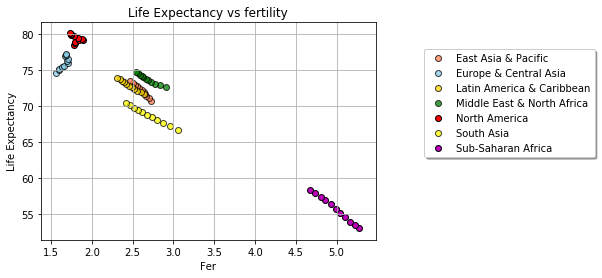

In [533]:
plt.scatter(y_fer["East Asia & Pacific"], y["East Asia & Pacific"],
            facecolor="coral", alpha=0.75, edgecolors = 'black' ,label = "East Asia & Pacific")
plt.scatter(y_fer["Europe & Central Asia"],y["Europe & Central Asia"],
            facecolor="skyblue", alpha=0.75, edgecolors = 'black' ,label = "Europe & Central Asia")
plt.scatter(y_fer["Latin America & Caribbean"],y["Latin America & Caribbean"],
            facecolor="gold",  alpha=0.75, edgecolors = 'black' ,label = "Latin America & Caribbean")
plt.scatter(y_fer["Middle East & North Africa"],y["Middle East & North Africa"],
            facecolor="green",  alpha=0.75, edgecolors = 'black' ,label = "Middle East & North Africa")
plt.scatter(y_fer["North America"],y["North America"],facecolor="red", 
            alpha=1, edgecolors = 'black' ,label = "North America")
plt.scatter(y_fer["South Asia"],y["South Asia"],
            facecolor="yellow",  alpha=0.75, edgecolors = 'black' ,label = "South Asia")
plt.scatter(y_fer["Sub-Saharan Africa"],y["Sub-Saharan Africa"],
            facecolor="m",  alpha=1, edgecolors = 'black' ,label = "Sub-Saharan Africa")
plt.grid()
lgnd = plt.legend(loc='upper left',title='Region')

plt.title("Life Expectancy vs fertility")
plt.xlabel("Fer")
plt.ylabel("Life Expectancy")
plt.legend(loc='upper center', bbox_to_anchor=(1.4, 0.9), shadow=True, ncol=1)
plt.savefig("Life_Expectancy_vs_fertility.png")

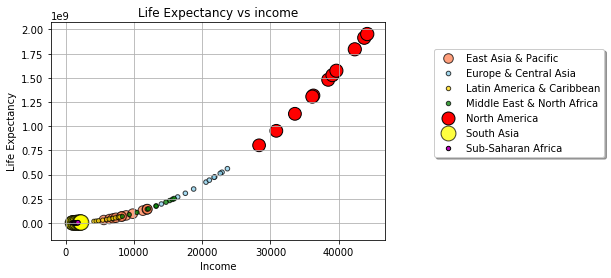

In [439]:
plt.scatter(y_inc["East Asia & Pacific"], y2["East Asia & Pacific"],
            s=y_pop["East Asia & Pacific"]/1000000,facecolor="coral", alpha=0.75, edgecolors = 'black' ,label = "East Asia & Pacific")
plt.scatter(y_inc["Europe & Central Asia"],y2["Europe & Central Asia"],
            s=y_pop["Europe & Central Asia"]/1000000,facecolor="skyblue", alpha=0.75, edgecolors = 'black' ,label = "Europe & Central Asia")
plt.scatter(y_inc["Latin America & Caribbean"],y2["Latin America & Caribbean"],
            s=y_pop["Latin America & Caribbean"]/1000000,facecolor="gold",  alpha=0.75, edgecolors = 'black' ,label = "Latin America & Caribbean")
plt.scatter(y_inc["Middle East & North Africa"],y2["Middle East & North Africa"],
            s=y_pop["Middle East & North Africa"]/1000000,facecolor="green",  alpha=0.75, edgecolors = 'black' ,label = "Middle East & North Africa")
plt.scatter(y_inc["North America"],y2["North America"],facecolor="red", 
            s=y_pop["North America"]/1000000,alpha=1, edgecolors = 'black' ,label = "North America")
plt.scatter(y_inc["South Asia"],y2["South Asia"],
            s=y_pop["South Asia"]/1000000,facecolor="yellow",  alpha=0.75, edgecolors = 'black' ,label = "South Asia")
plt.scatter(y_inc["Sub-Saharan Africa"],y2["Sub-Saharan Africa"],
            s=y_pop["Sub-Saharan Africa"]/1000000,facecolor="m",  alpha=1, edgecolors = 'black' ,label = "Sub-Saharan Africa")
plt.grid()
lgnd = plt.legend(loc='upper left',title='Region')

plt.title("Life Expectancy vs income")
plt.xlabel("Income")
plt.ylabel("Life Expectancy")
plt.legend(loc='upper center', bbox_to_anchor=(1.4, 0.9), shadow=True, ncol=1)

In [440]:
df_life_reindex = pd.concat([data['2003_life'], data['2004_life'],data['2005_life'],data['2006_life'],
                           data['2007_life'],data['2008_life'],data['2009_life'],data['2010_life'],
                           data['2011_life'],data['2012_life'],data['2013_life']],ignore_index=True)
df_pop_reindex = pd.concat([data['2003_population'], data['2004_population'],data['2005_population'],data['2006_population'],
                           data['2007_population'],data['2008_population'],data['2009_population'],data['2010_population'],
                           data['2011_population'],data['2012_population'],data['2013_population']],ignore_index=True)
df_inc_reindex = pd.concat([data['2003_inc'], data['2004_inc'],data['2005_inc'],data['2006_inc'],
                           data['2007_inc'],data['2008_inc'],data['2009_inc'],data['2010_inc'],
                           data['2011_inc'],data['2012_inc'],data['2013_inc']],ignore_index=True)
df_fer_reindex = pd.concat([data['2003_fer'], data['2004_fer'],data['2005_fer'],data['2006_fer'],
                           data['2007_fer'],data['2008_fer'],data['2009_fer'],data['2010_fer'],
                           data['2011_fer'],data['2012_fer'],data['2013_fer']],ignore_index=True)

In [441]:
new_df = pd.DataFrame({"LifeExpec":df_life_reindex,
                      "Pop":df_pop_reindex,
                      "Fer":df_fer_reindex,
                      "Income":df_inc_reindex})
new_df.describe()

,LifeExpec,Pop,Fer,Income
count,1749.000000,1.749000e+03,1749.000000,1749.000000
mean,69.200091,4.095896e+07,2.933330,9776.398435
std,9.678525,1.447895e+08,1.525087,14125.925022
min,40.486073,8.250000e+04,1.076000,48.205872
25%,63.441000,2.992547e+06,1.800000,934.265965
50%,72.158610,9.231041e+06,2.418000,3294.858972
75%,76.089390,2.740949e+07,3.760000,11376.075880
max,83.331951,1.357380e+09,7.658000,82487.467830


In [442]:
corr_matrix = new_df.corr()
corr_matrix["LifeExpec"].sort_values(ascending=False)

LifeExpec    1.000000
Income       0.595172
Pop          0.021720
Fer         -0.831430
Name: LifeExpec, dtype: float64

Text(0.5, 15.0, 'Population')

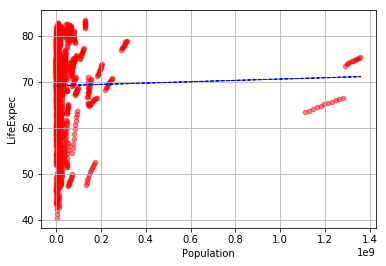

In [534]:
new_df.plot(kind="scatter", x="Pop", y="LifeExpec", alpha=0.5,color = 'red')
plt.grid()
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress( new_df['Pop'], new_df['LifeExpec'])
vc_fit = vc_slope * new_df['Pop'] + vc_int
plt.plot(new_df['Pop'], vc_fit, "b--", linewidth=1)
plt.savefig('scatterplot_lifeexpec_vs_population.png')
plt.xlabel("Population")


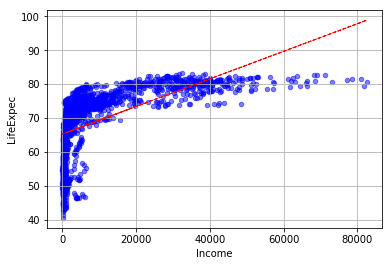

In [535]:
new_df.plot(kind="scatter", x="Income", y="LifeExpec", alpha=0.5,color = 'blue')
plt.grid()
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress( new_df['Income'], new_df['LifeExpec'])
vc_fit = vc_slope * new_df['Income'] + vc_int
plt.plot(new_df['Income'], vc_fit, "r--", linewidth=1)
plt.savefig('scatter_life_expectancy_vs_income.png')


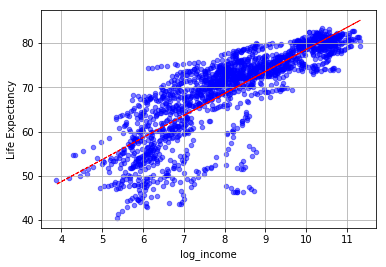

In [553]:
new_df["log_income"] = np.log(new_df["Income"])
new_df.plot(kind="scatter", x="log_income", y="LifeExpec", alpha=0.5,color = 'blue')
plt.grid()
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress( new_df['log_income'], new_df['LifeExpec'])
vc_fit = vc_slope * new_df['log_income'] + vc_int
plt.plot(new_df['log_income'], vc_fit, "r--", linewidth=1)
plt.ylabel("Life Expectancy")
plt.savefig('scatter_life_expectancy_vs_log_income.png')

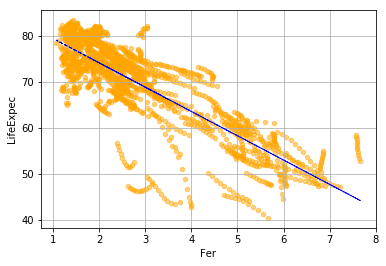

In [538]:
new_df.plot(kind="scatter", x="Fer", y="LifeExpec", alpha=0.5,color = 'orange')
plt.grid()
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress( new_df['Fer'], new_df['LifeExpec'])
vc_fit = vc_slope * new_df['Fer'] + vc_int
plt.plot(new_df['Fer'], vc_fit, "b--", linewidth=1)
plt.savefig('Scatter_expectancy_vs_fertility.png')

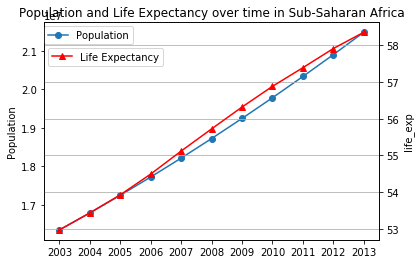

In [629]:
data_life_ex_new = data_life_ex[data_life_ex['Region'] == 'Sub-Saharan Africa']
data_pop_new = data_pop[data_pop['Region'] == 'Sub-Saharan Africa']
data_life_ex_new.drop(['Country Code','Region'], axis=1, inplace=True)
data_pop_new.drop(['Country Code','Region'], axis=1, inplace=True)
data_pop_new.reset_index()
data_life_ex_new.reset_index()
life_mean = data_life_ex_new.mean()
pop_mean = data_pop_new.mean()
year = ['2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013']
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(year,pop_mean,marker = "o",label = "Population")
ax1.legend(loc =(0,0.9))
ax1.set_ylabel('Population')


ax2 = ax1.twinx()
ax2.plot(year,life_mean,marker = "^",color='red',label = "Life Expectancy")
ax2.set_ylabel('life_exp')
plt.grid()
plt.title("Population and Life Expectancy over time in Sub-Saharan Africa")
ax2.legend(loc = (0.01,0.8))
plt.savefig("Sub_Saharan_Africa_pop_and_life_expec_overtime")

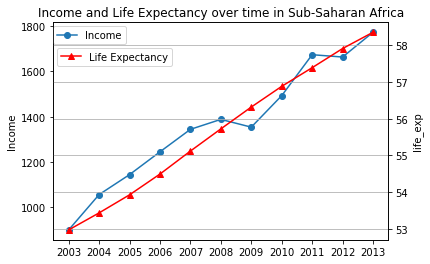

In [627]:
data_life_ex_new = data_life_ex[data_life_ex['Region'] == 'Sub-Saharan Africa']
data_inc_new = data_inc[data_inc['Region'] == 'Sub-Saharan Africa']
data_life_ex_new.drop(['Country Code','Region'], axis=1, inplace=True)
data_inc_new.drop(['Country Code','Region'], axis=1, inplace=True)
data_inc_new.reset_index()
data_life_ex_new.reset_index()
life_mean = data_life_ex_new.mean()
inc_mean = data_inc_new.mean()
year = ['2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013']
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(year,inc_mean,marker = "o",label = "Income")
ax1.set_ylabel('Income')
ax1.legend(loc =(0,0.9))

ax2 = ax1.twinx()
ax2.plot(year,life_mean,marker = "^",color='red',label = "Life Expectancy")
ax2.set_ylabel('life_exp')
plt.title("Income and Life Expectancy over time in Sub-Saharan Africa")
plt.grid()
ax2.legend(loc =(0.01,0.8))
plt.savefig("Sub_Saharan_Africa_income_and_life_expec_overtime")

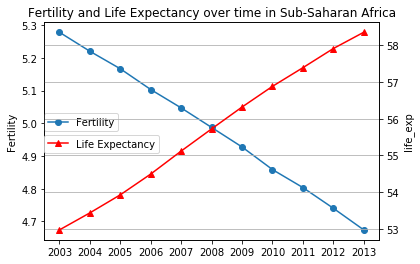

In [630]:
data_life_ex_new = data_life_ex[data_life_ex['Region'] == 'Sub-Saharan Africa']
data_fer_new = data_fer[data_fer['Region'] == 'Sub-Saharan Africa']
data_life_ex_new.drop(['Country Code','Region'], axis=1, inplace=True)
data_fer_new.drop(['Country Code','Region'], axis=1, inplace=True)
data_fer_new.reset_index()
data_life_ex_new.reset_index()
life_mean = data_life_ex_new.mean()
fer_mean = data_fer_new.mean()
year = ['2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013']
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(year,fer_mean,marker = "o",label = "Fertility")
ax1.set_ylabel('Fertility')
ax1.legend(loc =(0,0.5))

ax2 = ax1.twinx()
ax2.plot(year,life_mean,marker = "^",color='red',label = "Life Expectancy")
ax2.set_ylabel('life_exp')
plt.title("Fertility and Life Expectancy over time in Sub-Saharan Africa")
plt.grid()
ax2.legend(loc =(0,0.4))
plt.savefig("Sub_Saharan_Africa_fertility_and_life_expec_overtime")

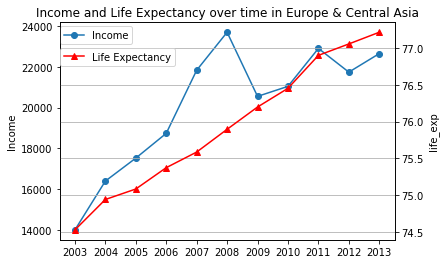

In [631]:
data_life_ex_new = data_life_ex[data_life_ex['Region'] == 'Europe & Central Asia']
data_inc_new = data_inc[data_inc['Region'] == 'Europe & Central Asia']
data_life_ex_new.drop(['Country Code','Region'], axis=1, inplace=True)
data_inc_new.drop(['Country Code','Region'], axis=1, inplace=True)
data_inc_new.reset_index()
data_life_ex_new.reset_index()
life_mean = data_life_ex_new.mean()
inc_mean = data_inc_new.mean()
year = ['2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013']
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(year,inc_mean,marker = "o",label = "Income")
ax1.set_ylabel('Income')
ax1.legend(loc =(0,0.9))

ax2 = ax1.twinx()
ax2.plot(year,life_mean,marker = "^",color='red',label = "Life Expectancy")
ax2.set_ylabel('life_exp')
plt.title("Income and Life Expectancy over time in Europe & Central Asia")
plt.grid()
ax2.legend(loc =(0,0.8))
plt.savefig("Europe_&_Central_Asia_income_and_life_expec_overtime")

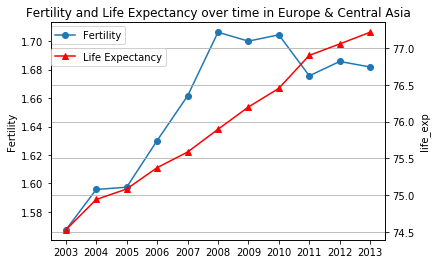

In [632]:
data_life_ex_new = data_life_ex[data_life_ex['Region'] == 'Europe & Central Asia']
data_fer_new = data_fer[data_fer['Region'] == 'Europe & Central Asia']
data_life_ex_new.drop(['Country Code','Region'], axis=1, inplace=True)
data_fer_new.drop(['Country Code','Region'], axis=1, inplace=True)
data_fer_new.reset_index()
data_life_ex_new.reset_index()
life_mean = data_life_ex_new.mean()
fer_mean = data_fer_new.mean()
year = ['2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013']
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(year,fer_mean,marker = "o",label = "Fertility")
ax1.set_ylabel('Fertility')
ax1.legend(loc =(0,0.9))

ax2 = ax1.twinx()
ax2.plot(year,life_mean,marker = "^",color='red',label = "Life Expectancy")
ax2.set_ylabel('life_exp')
plt.title("Fertility and Life Expectancy over time in Europe & Central Asia")
plt.grid()
ax2.legend(loc =(0,0.8))
plt.savefig("Europe_&_Central_Asia_fertility_and_life_expec_overtime")

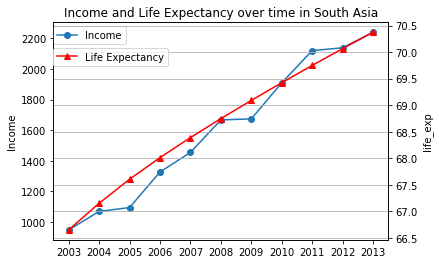

In [633]:
data_life_ex_new = data_life_ex[data_life_ex['Region'] == 'South Asia']
data_inc_new = data_inc[data_inc['Region'] == 'South Asia']
data_life_ex_new.drop(['Country Code','Region'], axis=1, inplace=True)
data_inc_new.drop(['Country Code','Region'], axis=1, inplace=True)
data_inc_new.reset_index()
data_life_ex_new.reset_index()
life_mean = data_life_ex_new.mean()
inc_mean = data_inc_new.mean()
year = ['2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013']
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(year,inc_mean,marker = "o",label = "Income")
ax1.set_ylabel('Income')
ax1.legend(loc =(0,0.9))

ax2 = ax1.twinx()
ax2.plot(year,life_mean,marker = "^",color='red',label = "Life Expectancy")
ax2.set_ylabel('life_exp')
plt.title("Income and Life Expectancy over time in South Asia")
plt.grid()
ax2.legend(loc =(0,0.8))
plt.savefig("South_Asia_income_and_life_expec_overtime")

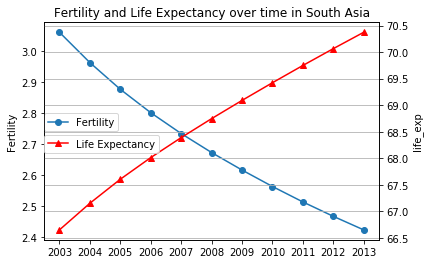

In [634]:
data_life_ex_new = data_life_ex[data_life_ex['Region'] == 'South Asia']
data_fer_new = data_fer[data_fer['Region'] == 'South Asia']
data_life_ex_new.drop(['Country Code','Region'], axis=1, inplace=True)
data_fer_new.drop(['Country Code','Region'], axis=1, inplace=True)
data_fer_new.reset_index()
data_life_ex_new.reset_index()
life_mean = data_life_ex_new.mean()
fer_mean = data_fer_new.mean()
year = ['2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013']
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(year,fer_mean,marker = "o",label = "Fertility")
ax1.set_ylabel('Fertility')
ax1.legend(loc =(0,0.5))

ax2 = ax1.twinx()
ax2.plot(year,life_mean,marker = "^",color='red',label = "Life Expectancy")
ax2.set_ylabel('life_exp')
plt.title("Fertility and Life Expectancy over time in South Asia")
plt.grid()
ax2.legend(loc =(0,0.4))
plt.savefig("South_Asia_fertility_and_life_expec_overtime")

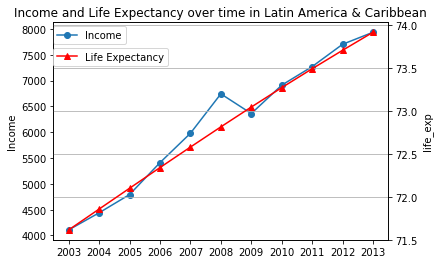

In [635]:
data_life_ex_new = data_life_ex[data_life_ex['Region'] == 'Latin America & Caribbean']
data_inc_new = data_inc[data_inc['Region'] == 'Latin America & Caribbean']
data_life_ex_new.drop(['Country Code','Region'], axis=1, inplace=True)
data_inc_new.drop(['Country Code','Region'], axis=1, inplace=True)
data_inc_new.reset_index()
data_life_ex_new.reset_index()
life_mean = data_life_ex_new.mean()
inc_mean = data_inc_new.mean()
year = ['2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013']
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(year,inc_mean,marker = "o",label = "Income")
ax1.set_ylabel('Income')
ax1.legend(loc =(0,0.9))

ax2 = ax1.twinx()
ax2.plot(year,life_mean,marker = "^",color='red',label = "Life Expectancy")
ax2.set_ylabel('life_exp')
plt.title("Income and Life Expectancy over time in Latin America & Caribbean")
plt.grid()
ax2.legend(loc =(0,0.8))
plt.savefig("Latin_America_&_Caribbean_income_and_life_expec_overtime")

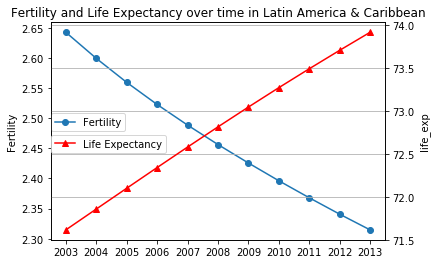

In [636]:
data_life_ex_new = data_life_ex[data_life_ex['Region'] == 'Latin America & Caribbean']
data_fer_new = data_fer[data_fer['Region'] == 'Latin America & Caribbean']
data_life_ex_new.drop(['Country Code','Region'], axis=1, inplace=True)
data_fer_new.drop(['Country Code','Region'], axis=1, inplace=True)
data_fer_new.reset_index()
data_life_ex_new.reset_index()
life_mean = data_life_ex_new.mean()
fer_mean = data_fer_new.mean()
year = ['2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013']
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(year,fer_mean,marker = "o",label = "Fertility")
ax1.set_ylabel('Fertility')
ax1.legend(loc =(0,0.5))

ax2 = ax1.twinx()
ax2.plot(year,life_mean,marker = "^",color='red',label = "Life Expectancy")
ax2.set_ylabel('life_exp')
plt.title("Fertility and Life Expectancy over time in Latin America & Caribbean")
plt.grid()
ax2.legend(loc =(0,0.4))
plt.savefig("Latin_America_&_Caribbean_fertility_and_life_expec_overtime")

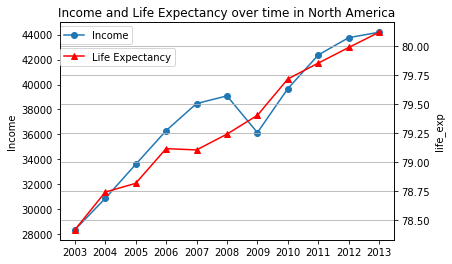

In [637]:
data_life_ex_new = data_life_ex[data_life_ex['Region'] == 'North America']
data_inc_new = data_inc[data_inc['Region'] == 'North America']
data_life_ex_new.drop(['Country Code','Region'], axis=1, inplace=True)
data_inc_new.drop(['Country Code','Region'], axis=1, inplace=True)
data_inc_new.reset_index()
data_life_ex_new.reset_index()
life_mean = data_life_ex_new.mean()
inc_mean = data_inc_new.mean()
year = ['2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013']
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(year,inc_mean,marker = "o",label ="Income")
ax1.set_ylabel('Income')
ax1.legend(loc =(0,0.9))

ax2 = ax1.twinx()
ax2.plot(year,life_mean,marker = "^",color='red',label = "Life Expectancy")
ax2.set_ylabel('life_exp')
plt.title("Income and Life Expectancy over time in North America")
plt.grid()
ax2.legend(loc =(0,0.8))
plt.savefig("North_America_income_and_life_expec_overtime")

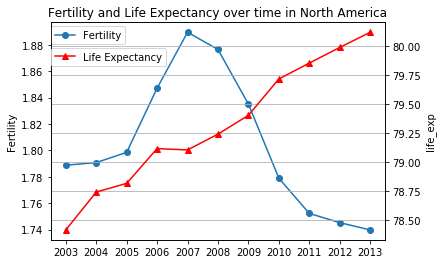

In [638]:
data_life_ex_new = data_life_ex[data_life_ex['Region'] == 'North America']
data_fer_new = data_fer[data_fer['Region'] == 'North America']
data_life_ex_new.drop(['Country Code','Region'], axis=1, inplace=True)
data_fer_new.drop(['Country Code','Region'], axis=1, inplace=True)
data_fer_new.reset_index()
data_life_ex_new.reset_index()
life_mean = data_life_ex_new.mean()
fer_mean = data_fer_new.mean()
year = ['2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013']
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(year,fer_mean,marker = "o",label = "Fertility")
ax1.set_ylabel('Fertility')
ax1.legend(loc =(0,0.9))

ax2 = ax1.twinx()
ax2.plot(year,life_mean,marker = "^",color='red',label = "Life Expectancy")
ax2.set_ylabel('life_exp')
plt.title("Fertility and Life Expectancy over time in North America")
plt.grid()
ax2.legend(loc =(0,0.8))
plt.savefig("North_America_fertility_and_life_expec_overtime")

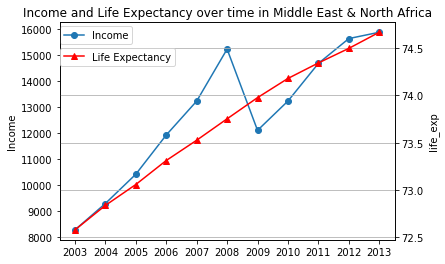

In [639]:
data_life_ex_new = data_life_ex[data_life_ex['Region'] == 'Middle East & North Africa']
data_inc_new = data_inc[data_inc['Region'] == 'Middle East & North Africa']
data_life_ex_new.drop(['Country Code','Region'], axis=1, inplace=True)
data_inc_new.drop(['Country Code','Region'], axis=1, inplace=True)
data_inc_new.reset_index()
data_life_ex_new.reset_index()
life_mean = data_life_ex_new.mean()
inc_mean = data_inc_new.mean()
year = ['2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013']
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(year,inc_mean,marker = "o",label = "Income")
ax1.set_ylabel('Income')
ax1.legend(loc =(0,0.9))

ax2 = ax1.twinx()
ax2.plot(year,life_mean,marker = "^",color='red',label = "Life Expectancy")
ax2.set_ylabel('life_exp')
plt.title("Income and Life Expectancy over time in Middle East & North Africa")
plt.grid()
ax2.legend(loc =(0,0.8))
plt.savefig("Middle_East_&_North_Africa_income_and_life_expec_overtime")

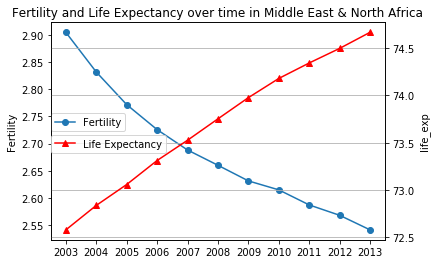

In [640]:
data_life_ex_new = data_life_ex[data_life_ex['Region'] == 'Middle East & North Africa']
data_fer_new = data_fer[data_fer['Region'] == 'Middle East & North Africa']
data_life_ex_new.drop(['Country Code','Region'], axis=1, inplace=True)
data_fer_new.drop(['Country Code','Region'], axis=1, inplace=True)
data_fer_new.reset_index()
data_life_ex_new.reset_index()
life_mean = data_life_ex_new.mean()
fer_mean = data_fer_new.mean()
year = ['2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013']
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(year,fer_mean,marker = "o",label = "Fertility")
ax1.set_ylabel('Fertility')
ax1.legend(loc =(0,0.5))

ax2 = ax1.twinx()
ax2.plot(year,life_mean,marker = "^",color='red',label = "Life Expectancy")
ax2.set_ylabel('life_exp')
plt.title("Fertility and Life Expectancy over time in Middle East & North Africa")
plt.grid()
ax2.legend(loc =(0,0.4))
plt.savefig("Middle_East_&_North_Africa_fertility_and_life_expec_overtime")

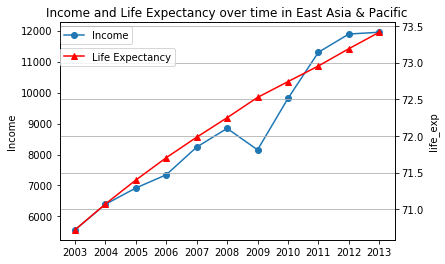

In [641]:
data_life_ex_new = data_life_ex[data_life_ex['Region'] == 'East Asia & Pacific']
data_inc_new = data_inc[data_inc['Region'] == 'East Asia & Pacific']
data_life_ex_new.drop(['Country Code','Region'], axis=1, inplace=True)
data_inc_new.drop(['Country Code','Region'], axis=1, inplace=True)
data_inc_new.reset_index()
data_life_ex_new.reset_index()
life_mean = data_life_ex_new.mean()
inc_mean = data_inc_new.mean()
year = ['2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013']
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(year,inc_mean,marker = "o",label = "Income")
ax1.set_ylabel('Income')
ax1.legend(loc =(0,0.9))

ax2 = ax1.twinx()
ax2.plot(year,life_mean,marker = "^",color='red',label = "Life Expectancy")
ax2.set_ylabel('life_exp')
plt.title("Income and Life Expectancy over time in East Asia & Pacific")
plt.grid()
ax2.legend(loc =(0,0.8))
plt.savefig("East_Asia_&_Pacific_income_and_life_expec_overtime")

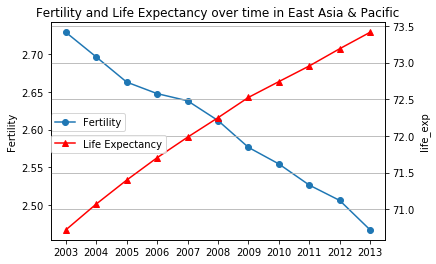

In [642]:
data_life_ex_new = data_life_ex[data_life_ex['Region'] == 'East Asia & Pacific']
data_fer_new = data_fer[data_fer['Region'] == 'East Asia & Pacific']
data_life_ex_new.drop(['Country Code','Region'], axis=1, inplace=True)
data_fer_new.drop(['Country Code','Region'], axis=1, inplace=True)
data_fer_new.reset_index()
data_life_ex_new.reset_index()
life_mean = data_life_ex_new.mean()
fer_mean = data_fer_new.mean()
year = ['2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013']
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(year,fer_mean,marker = "o",label = "Fertility")
ax1.set_ylabel('Fertility')
ax1.legend(loc =(0,0.5))

ax2 = ax1.twinx()
ax2.plot(year,life_mean,marker = "^",color='red',label = "Life Expectancy")
ax2.set_ylabel('life_exp')
plt.title("Fertility and Life Expectancy over time in East Asia & Pacific")
plt.grid()
ax2.legend(loc =(0,0.4))
plt.savefig("East_Asia_&_Pacific_fertility_and_life_expec_overtime")